<a href="https://colab.research.google.com/github/MEnisSen/Diabetes_PCA/blob/main/Diabetes_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data from Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
! kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 6.43MB/s]


In [ ]:
! unzip diabetes-dataset.zip

Archive:  diabetes-dataset.zip
  inflating: diabetes.csv            


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Correlation Matrix

In [ ]:
labels = df['Outcome'].to_numpy()

standardized_df = df.drop(columns=['Outcome'], axis=1)
for col in standardized_df.columns:
  standardized_df[col] = (df[col] - df[col].mean()) / df[col].std()

In [ ]:
standardized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483


In [ ]:
corr_matrix = standardized_df.corr()

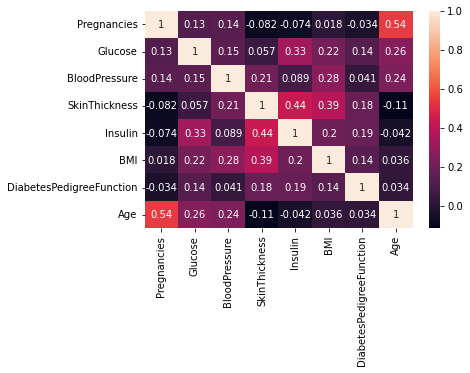

In [ ]:
sn.heatmap(corr_matrix, annot=True)

In [ ]:
ftr1 = abs(corr_matrix-np.eye(corr_matrix.shape[0])).idxmax()[0]
ftr2 = abs(corr_matrix-np.eye(corr_matrix.shape[0]))[ftr1].idxmax()
print("Most similar features: ", ftr1, "-", ftr2)

ftr3 = abs(corr_matrix).idxmin()[0]
ftr4 = abs(corr_matrix)[ftr3].idxmin()
print("Least similar features: ", ftr3, "-", ftr4)

Most similar features:  Age - Pregnancies
Least similar features:  BMI - Pregnancies


# Principal Components

In [ ]:
A = np.matmul(standardized_df.T, standardized_df) / (standardized_df.shape[0] - 1)
evalues, evectors = np.linalg.eig(A)
print("Eigenvalues :", evalues)

Eigenvalues : [2.09437995 1.73121014 0.41981618 0.40446205 0.68262839 0.76234439
 0.87552904 1.02962987]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
top_val_ind = evalues.argsort()[::-1]
top_evals = evalues[top_val_ind[0:3]]

In [ ]:
W = np.concatenate(([evectors[top_val_ind[0]]], [evectors[top_val_ind[1]]]), axis=0)
W = np.concatenate((W, [evectors[top_val_ind[2]]]), axis=0)
W

array([[-0.1284321 , -0.59378583, -0.58879003,  0.11784098, -0.19359817,
         0.47560573, -0.08069115,  0.01308692],
       [-0.39308257, -0.17402908, -0.06015291,  0.45035526, -0.09416176,
        -0.46632804,  0.40432871, -0.46792282],
       [-0.19802707, -0.62058853,  0.71208542, -0.21166198,  0.03335717,
         0.10928996, -0.0712006 , -0.07524755]])

In [ ]:
new_df = np.matmul(standardized_df.to_numpy(), W.T)

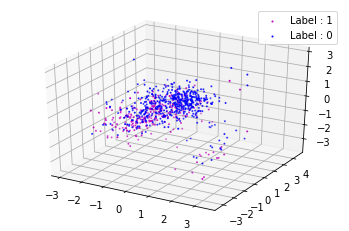

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter([new_df[i][0] for i in range(new_df.shape[0]) if labels[i] == 1],
           [new_df[i][1] for i in range(new_df.shape[0]) if labels[i] == 1],
           [new_df[i][2] for i in range(new_df.shape[0]) if labels[i] == 1], color = 'm', s=1, label='Label : 1')
ax.scatter([new_df[i][0] for i in range(new_df.shape[0]) if labels[i] == 0],
           [new_df[i][1] for i in range(new_df.shape[0]) if labels[i] == 0],
           [new_df[i][2] for i in range(new_df.shape[0]) if labels[i] == 0], color = 'b', s=1, label='Label : 0')

plt.legend()
plt.show()

# Total Variation

In [ ]:
print("Total variation :", sum(top_evals)/sum(evalues))

Total variation : 0.606902494386585


# Linear Regression

In [ ]:
top_2_evals = evalues[top_val_ind[0:2]]
W = np.concatenate(([evectors[top_val_ind[0]]], [evectors[top_val_ind[1]]]), axis=0)
new_df = np.matmul(standardized_df.to_numpy(), W.T)

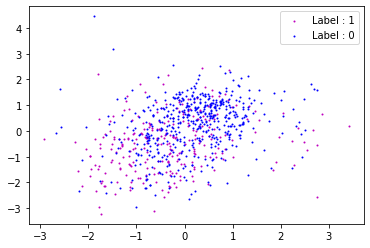

In [ ]:
plt.scatter([new_df[i][0] for i in range(new_df.shape[0]) if labels[i] == 1],
           [new_df[i][1] for i in range(new_df.shape[0]) if labels[i] == 1], color = 'm', s=1, label='Label : 1')
plt.scatter([new_df[i][0] for i in range(new_df.shape[0]) if labels[i] == 0],
           [new_df[i][1] for i in range(new_df.shape[0]) if labels[i] == 0], color = 'b', s=1, label='Label : 0')

plt.legend()
plt.show()

In [ ]:
Vevalues, Vevectors = np.linalg.eig(np.matmul(new_df.T, new_df))
Vnew_evals = 1/Vevalues
sigma_evals = 1/np.sqrt(Vevalues)

Uevalues, Uevectors = np.linalg.eig(np.matmul(new_df, new_df.T))

Sgm_T = np.zeros((new_df.shape[1],new_df.shape[0]))

V = Vevectors.T
np.fill_diagonal(Sgm_T, sigma_evals)
U_T = Uevectors.T
b = labels

In [ ]:
print(V.shape, Sgm_T.shape, U_T.shape, b.shape)

(2, 2) (2, 768) (768, 768) (768,)


In [ ]:
x = V.dot(Sgm_T.dot(U_T.dot(b)))

In [ ]:
np.real(x)

array([0.16647061, 0.0983685 ])